# Python Assignment 4

⏱⏱⏱**Due: 11/30/2025 11:59:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Total points: 150 (equivalent to 15 points after conversion)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.

Please adhere to the constraint of using only the `numpy`, `torch`, `scipy`, and `matplotlib` libraries for this assignment, as it is feasible to complete the task without introducing additional libraries or packages.



## 2. Implementing Gradient Descent Algorithm (60 pts)

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is always positive for all $k$.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o1.png)
![o2](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o2.png)
![o3](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o3.png)

Please note that the graphs generated as output may not precisely match the ones I'm providing here. The disparities could be significant, as I'm presenting a general overview of the expected graph. I've adjusted certain parameters/plot information in the graph generation process to prevent disclosing the "answer/solution".&nbsp;


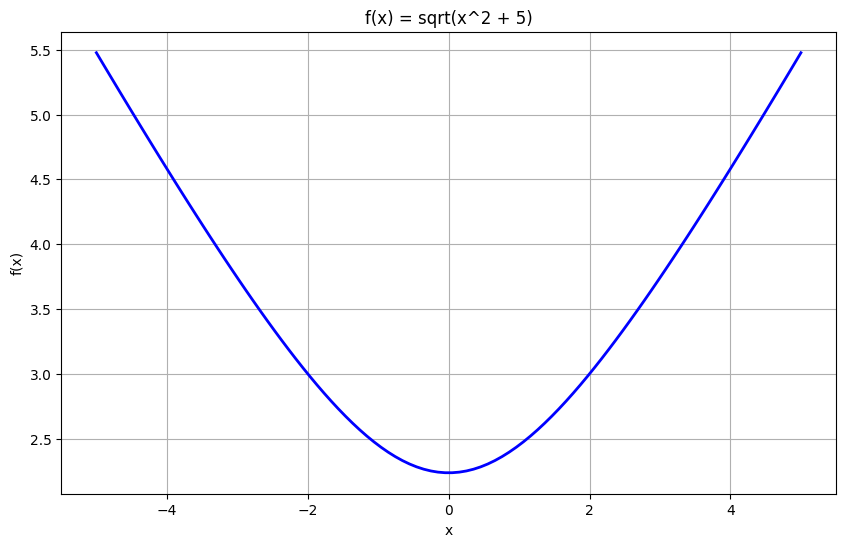

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x).
def f(x):
    return np.sqrt(x**2 + 5)


# Plot the function f(x), np.linspace might be helpful.
x_vals = np.linspace(-5, 5, 100)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, 'b-', linewidth=2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('f(x) = sqrt(x^2 + 5)')
plt.grid(True)
plt.show()



Initial x0: 1.0
Final x_T after 50 iterations: 0.000000


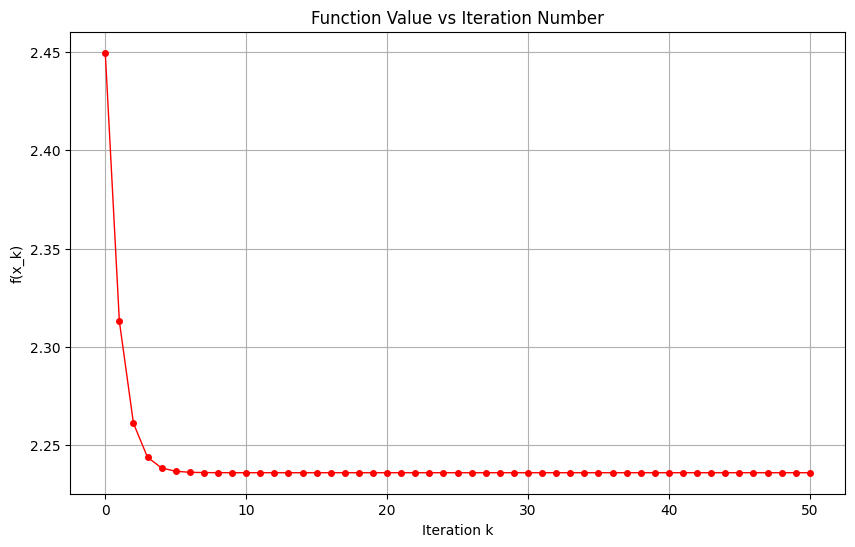

In [2]:
# Define the derivative of the function f(x), for gradient descent
def df(x):
    return x / np.sqrt(x**2 + 5)

# write a function to run the Gradient Descent Algorithm, take input arguments x_0, step_size, and num_iterations; return a list/array of x_k values.
def gradient_descent(x0, step_size, num_iterations):
    x_values = [x0]
    for i in range(num_iterations):
        x_new = x_values[-1] - step_size * df(x_values[-1])
        x_values.append(x_new)
    return x_values

# set up/assign initial values
last_digit = 0  
x0 = last_digit / 5 + 1
step_size = 1
num_iterations = 50


# Run gradient descent by calling the function
x_values = gradient_descent(x0, step_size, num_iterations)

# report x_T by printing out the value
x_T = x_values[-1]
print(f"Initial x0: {x0}")
print(f"Final x_T after {num_iterations} iterations: {x_T:.6f}")

# Plot the f(x_k) values vs. iteration number
f_values = [f(x) for x in x_values]
plt.figure(figsize=(10, 6))
plt.plot(range(len(f_values)), f_values, 'ro-', markersize=4, linewidth=1)
plt.xlabel('Iteration k')
plt.ylabel('f(x_k)')
plt.title('Function Value vs Iteration Number')
plt.grid(True)
plt.show()


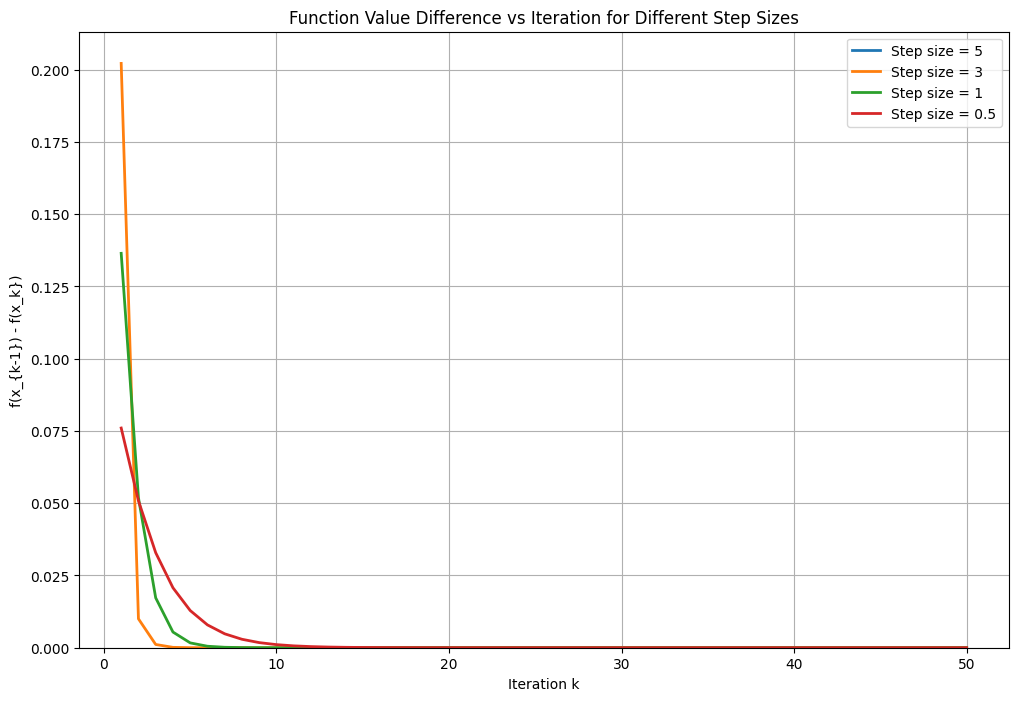

In [3]:
# create a list containing step sizes
step_sizes = [5, 3, 1, 0.5]

# initialize a list to store the results from different step sizes
all_differences = []

# loop through the step sizes and perform GD and record results
for step_size in step_sizes:
    x_values = gradient_descent(x0, step_size, num_iterations)
    f_values = [f(x) for x in x_values]
    
    # Calculate f(x_{k-1}) - f(x_k})
    differences = [f_values[i-1] - f_values[i] for i in range(1, len(f_values))]
    all_differences.append(differences)

# plot multiple curves in a single graph
plt.figure(figsize=(12, 8))
for i, step_size in enumerate(step_sizes):
    plt.plot(range(1, len(all_differences[i])+1), all_differences[i], 
             label=f'Step size = {step_size}', linewidth=2)

plt.xlabel('Iteration k')
plt.ylabel('f(x_{k-1}) - f(x_k})')
plt.title('Function Value Difference vs Iteration for Different Step Sizes')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)
plt.show()

## 3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data. We will employ the normal equation, a topic covered in class, to determine the coefficients and intercept (weights and bias).

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).** `numpy.linspace`, `numpy.meshgrid`, and [Surface Plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) methods might be helpful in plotting the plane. You don't have to use them, it is just my suggestions.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o4.png)



Intercept (bias): 3.9236
Coefficient for X1: 4.1590
Coefficient for X2: 0.3915


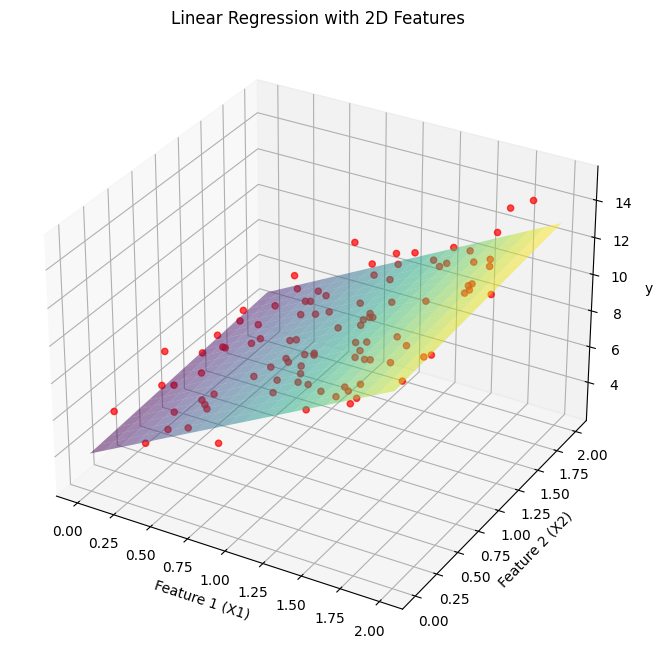

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Generate synthetic data
np.random.seed(47)   # change the seed to be the last two digits of your SB ID.
X = 2 * np.random.rand(100, 2)  # Generate 100 random 2D data points
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)  # Generate y values with noise

# Add a column of ones to X for the bias terms (intercept) in the normal equation

X_b = np.c_[np.ones((100, 1)), X]

# Find theta using the normal equation
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


# Print the intercept and coefficients of the regression plane
print(f"Intercept (bias): {theta[0]:.4f}")
print(f"Coefficient for X1: {theta[1]:.4f}")
print(f"Coefficient for X2: {theta[2]:.4f}")

# Plot the generated data and the regression plane

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y, c='red', marker='o', alpha=0.7, label='Data points')

x1_vals = np.linspace(0, 2, 20)
x2_vals = np.linspace(0, 2, 20)
x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)
y_pred_grid = theta[0] + theta[1] * x1_grid + theta[2] * x2_grid

surf = ax.plot_surface(x1_grid, x2_grid, y_pred_grid, alpha=0.5, 
                       cmap='viridis', label='Regression plane')

ax.set_xlabel('Feature 1 (X1)')
ax.set_ylabel('Feature 2 (X2)')
ax.set_zlabel('y')
ax.set_title('Linear Regression with 2D Features')
plt.show()

## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. Your task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.

Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.5784
Epoch 200, Loss: 0.5216
Epoch 300, Loss: 0.4796
Epoch 400, Loss: 0.4475
Epoch 500, Loss: 0.4223
Epoch 600, Loss: 0.4020
Epoch 700, Loss: 0.3853
Epoch 800, Loss: 0.3714
Epoch 900, Loss: 0.3595
Training Set Accuracy: 0.8750
Test Set Accuracy: 1.0000


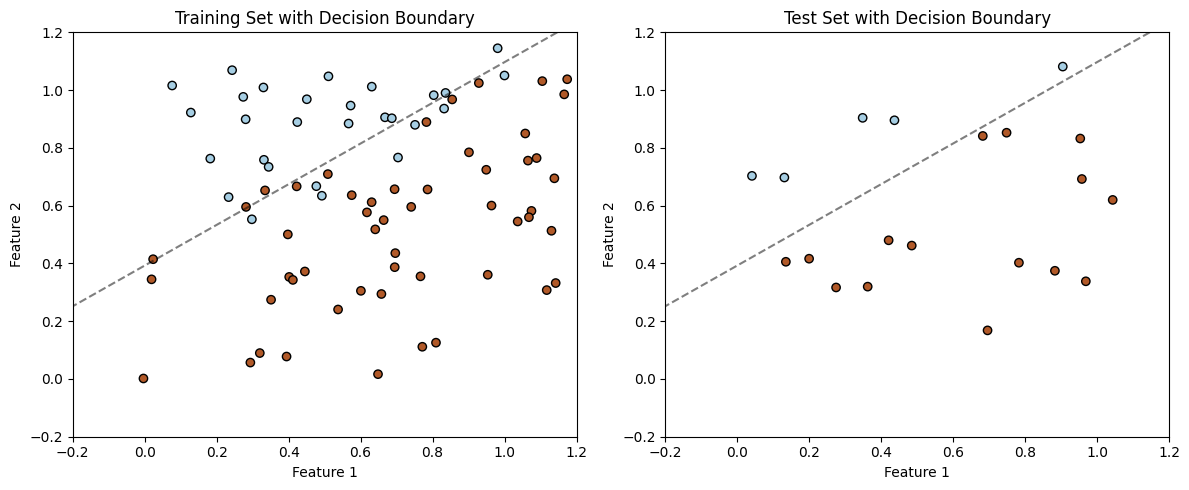

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic function
def sigmoid(z):
    """Compute the sigmoid function."""
    return 1 / (1 + np.exp(-z))

# Generate training and testing datasets
np.random.seed(595)
X = np.random.rand(2, 100)
w_true = np.array([1.5, -2.5])
b_true = 1.0
probabilities = sigmoid(np.dot(w_true.T, X) + b_true)
Y = (probabilities > 0.5).astype(int)
X = X + 0.3 * np.random.rand(2, 100) - 0.1 * np.random.rand(2, 100)

X_train, X_test = X[:,:80], X[:,80:]
Y_train, Y_test = Y[:80], Y[80:]


# Set hyperparameters and initialize parameters
w = np.zeros(X.shape[0])
b = 0.0
learning_rate = 0.1  # Tuned parameter
num_epochs = 1000    # Tuned parameter


# Start training
for epoch in range(num_epochs):
    # Forward pass
    A_train = sigmoid(np.dot(w.T, X_train) + b)
    
    # Compute gradients
    dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train)
    dJdb = np.mean(A_train - Y_train)
    
    # Update parameters
    w -= learning_rate * dJdw
    b -= learning_rate * dJdb
    
    # Print progress every 100 epochs
    if epoch % 100 == 0:
        loss = -np.mean(Y_train * np.log(A_train + 1e-8) + (1 - Y_train) * np.log(1 - A_train + 1e-8))
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Calculate training and testing accuracy
A_train = sigmoid(np.dot(w.T, X_train) + b)
predictions_train = (A_train > 0.5).astype(int)
train_accuracy = np.mean(predictions_train == Y_train)

A_test = sigmoid(np.dot(w.T, X_test) + b)
predictions_test = (A_test > 0.5).astype(int)
test_accuracy = np.mean(predictions_test == Y_test)

print(f"Training Set Accuracy: {train_accuracy:.4f}")
print(f"Test Set Accuracy: {test_accuracy:.4f}")

# Plot the training dataset and regression decision boundary
plt.figure(figsize=(12, 5))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(X_train[0, :], X_train[1, :], c=Y_train, cmap=plt.cm.Paired, edgecolors='k')
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Set with Decision Boundary')

# Test set
plt.subplot(1, 2, 2)
plt.scatter(X_test[0, :], X_test[1, :], c=Y_test, cmap=plt.cm.Paired, edgecolors='k')
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test Set with Decision Boundary')

plt.tight_layout()
plt.show()

## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


  Datasets: [train]: train_catvnoncat.h5, [test]: test_catvnoncat.h5

/Users/chiuchiu/miniforge3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Modified training set size: 167
Modified test set size: 42
Training on modified dataset...


/Users/chiuchiu/miniforge3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/chiuchiu/miniforge3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Loss: 0.6781
Epoch 2/10, Loss: 0.5283
Epoch 3/10, Loss: 0.4765
Epoch 4/10, Loss: 0.3769
Epoch 5/10, Loss: 0.3190
Epoch 6/10, Loss: 0.2806
Epoch 7/10, Loss: 0.2810
Epoch 8/10, Loss: 0.2956
Epoch 9/10, Loss: 0.2642
Epoch 10/10, Loss: 0.2591
Modified Test Accuracy: 0.9286
Number of incorrect predictions in modified test set: 3
Indices of incorrect predictions: [18, 40, 41]
Only 3 misclassified images available


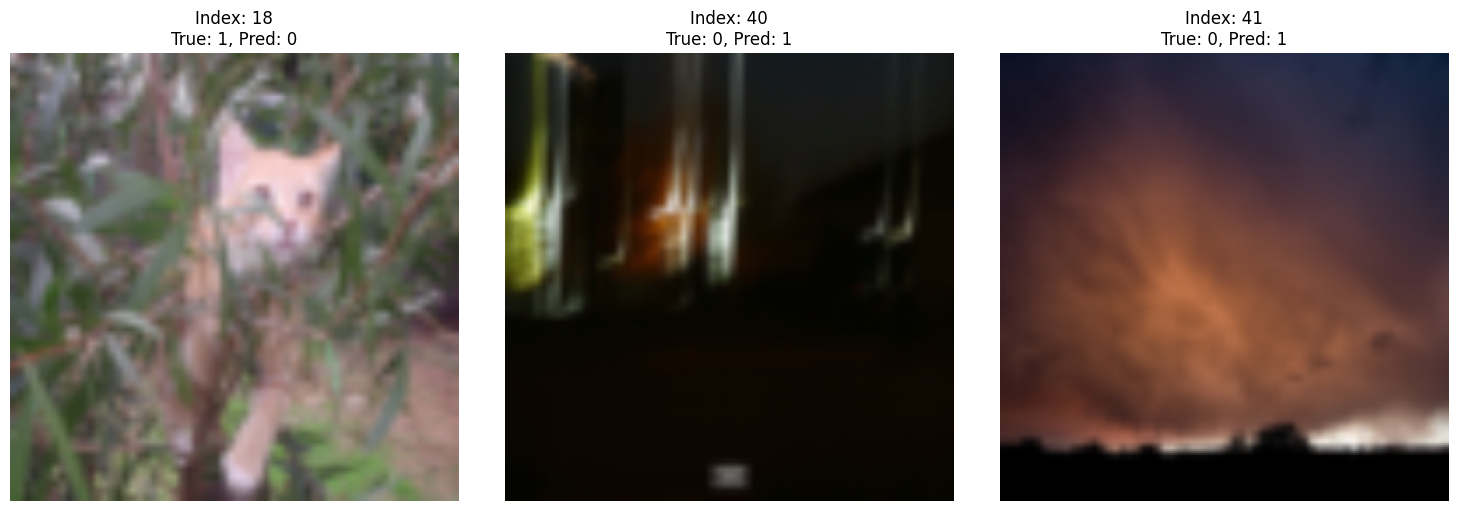

In [ ]:
# Import necessary packages
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import h5py
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms, models

# Same transform pipeline
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Modified Dataset class for custom split
class ModifiedCatDataset(Dataset):
    def __init__(self, h5_file, transform=None, train=True, last_digit=0):
        with h5py.File(h5_file, 'r') as f:
            images = f['train_set_x'][:]
            labels = f['train_set_y'][:]
        
        # Calculate split based on last digit of student ID
        train_size = 160 + last_digit
        
        if train:
            self.images = images[:train_size]
            self.labels = labels[:train_size]
        else:
            self.images = images[train_size:]
            self.labels = labels[train_size:]
        
        self.transform = transform
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, torch.tensor(label, dtype=torch.float32)

# Set last digit of student ID 
last_digit = 7

# Create modified datasets
modified_train_dataset = ModifiedCatDataset(
    '.../train_catvnoncat.h5', 
    transform=transform, 
    train=True, 
    last_digit=last_digit
)

modified_test_dataset = ModifiedCatDataset(
    '.../train_catvnoncat.h5', 
    transform=transform, 
    train=False, 
    last_digit=last_digit
)

print(f"Modified training set size: {len(modified_train_dataset)}")
print(f"Modified test set size: {len(modified_test_dataset)}")

# Create data loaders
modified_train_loader = DataLoader(modified_train_dataset, batch_size=32, shuffle=True)
modified_test_loader = DataLoader(modified_test_dataset, batch_size=32, shuffle=False)

# Load pretrained model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 1)
model = model.to(device)

# Set hyperparameters
criterion = nn.BCEWithLogitsLoss()  
optimizer = optim.Adam(model.parameters(), lr=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training function (same as before)
def train_model(model, train_loader, criterion, optimizer, scheduler, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images).squeeze()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        scheduler.step()
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}')

# Evaluation function (same as before)
def evaluate_model(model, test_loader):
    model.eval()
    all_predictions = []
    all_labels = []
    incorrect_indices = []
    
    with torch.no_grad():
        for batch_idx, (images, labels) in enumerate(test_loader):
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images).squeeze()
            predictions = (torch.sigmoid(outputs) > 0.5).float()
            
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            incorrect_mask = (predictions != labels).cpu().numpy()
            for i, is_incorrect in enumerate(incorrect_mask):
                if is_incorrect:
                    global_idx = batch_idx * test_loader.batch_size + i
                    incorrect_indices.append(global_idx)
    
    accuracy = np.mean(np.array(all_predictions) == np.array(all_labels))
    return accuracy, incorrect_indices

# Train on modified dataset
print("Training on modified dataset...")
train_model(model, modified_train_loader, criterion, optimizer, scheduler, num_epochs=10)

# Evaluate on modified test set
modified_test_accuracy, modified_incorrect_indices = evaluate_model(model, modified_test_loader)
print(f"Modified Test Accuracy: {modified_test_accuracy:.4f}")
print(f"Number of incorrect predictions in modified test set: {len(modified_incorrect_indices)}")
print(f"Indices of incorrect predictions: {modified_incorrect_indices}")

# Display misclassified images from modified test set
def display_misclassified(dataset, indices, num_display=4):
    fig, axes = plt.subplots(1, num_display, figsize=(15, 5))
    if num_display == 1:
        axes = [axes]
    
    for i, idx in enumerate(indices[:num_display]):
        image, true_label = dataset[idx]
        
        image = image.numpy().transpose(1, 2, 0)
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)
        
        axes[i].imshow(image)
        pred_label = 1 - true_label
        axes[i].set_title(f'Index: {idx}\nTrue: {int(true_label)}, Pred: {int(pred_label)}')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

if len(modified_incorrect_indices) >= 4:
    print("Displaying 4 misclassified images from modified test set:")
    display_misclassified(modified_test_dataset, modified_incorrect_indices, 4)
else:
    print(f"Only {len(modified_incorrect_indices)} misclassified images available")
    if modified_incorrect_indices:
        display_misclassified(modified_test_dataset, modified_incorrect_indices, len(modified_incorrect_indices))